# **Pro Grepper**

Description:

Multi Label Classification(Supervised Learning) on the data scraped from coding sites such as GFG,Leetcode for identifying the companies that a given problem might be asked in. It consists of a chrome extension to automatically tag the problems on the site which user is currently on and along with getting tags by manually pasting the problem on the webiste.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv('new_final.csv')

Columns of the dataset

In [ ]:
df.keys() 

Index(['problem_name', 'problem_link', 'problem_statement', 'microsoft',
       'zoho', 'google', 'hsbc', 'cisco', 'qualcomm', 'adobe',
       ...
       'binary indexed tree', 'geometry', 'machine learning', 'data type',
       'breadth-first search', 'logical-thinking', 'graph colouring', 'subset',
       'traversal', 'shortest path'],
      dtype='object', length=398)

Shape of the dataset

In [ ]:
df.shape

(3683, 398)

In [ ]:
sum_cols = df.iloc[:,3:301].sum(axis=0) 
sum_tags = df.iloc[:,301:].sum(axis=0)

In [ ]:
sort_cols = sum_cols.sort_values()[-30:]
sum_tags = sum_tags.sort_values()

In [ ]:
sort_cols

walmart             64
visa                65
snapchat            71
salesforce          73
twitter             73
paytm               73
snapdeal            78
morgan-stanley      78
sap                 78
makemytrip          80
zoho                86
flipkart            92
cisco               95
accolite           105
bytedance          107
ebay               115
yahoo              131
linkedin           136
vmware             136
samsung            139
goldman-sachs      174
oracle             240
uber               264
bloomberg          315
adobe              339
apple              344
facebook           496
google             782
microsoft          845
amazon            1233
dtype: int64

In [ ]:
sum_tags

dequeue                  1
operating systems        1
graph colouring          1
reverse                  1
machine learning         1
                      ... 
tree                   260
dynamic programming    384
string                 480
math                   699
array                  755
Length: 97, dtype: int64

In [ ]:
sum_tags.keys()

Index(['dequeue', 'operating systems', 'graph colouring', 'reverse',
       'machine learning', 'probability', 'inclusion-exclusion', 'quantifiers',
       'suffix array', 'logarithm', 'reservoir sampling', 'rejection sampling',
       'memoization', 'factorization', 'physics', 'practice-problems',
       'square root', 'puzzles', 'implementation', 'date-time', 'line sweep',
       'data type', 'kadane', 'brainteaser', 'pointers', 'shortest path',
       'merge sort', 'subset', 'topological sort', 'random', 'division',
       'binary indexed tree', 'regular expression', 'circular linked list',
       'priority-queue', 'minimax', 'doubly linked list', 'operators', 'class',
       'ordered map', 'pattern searching', 'game theory', 'set', 'prefix-sum',
       'factorial', 'traversal', 'functional', 'oop', 'java-collections',
       'logical-thinking', 'permutation', 'fibonacci', 'geometry',
       'segment tree', 'pattern-printing', 'union find', 'palindrome',
       'algorithms', 'combin

Dropping all the columns(companies) other than top 30

In [ ]:
remove = []
for key in df.keys()[3:301]:
  if key not in sort_cols.keys():
    remove.append(key)

df30 = df.drop(columns=remove)

In [ ]:
df30.head()

,problem_name,problem_link,problem_statement,microsoft,zoho,google,cisco,adobe,samsung,amazon,goldman-sachs,visa,accolite,flipkart,makemytrip,snapdeal,vmware,walmart,paytm,ebay,morgan-stanley,sap,facebook,oracle,apple,twitter,linkedin,yahoo,salesforce,bloomberg,bytedance,snapchat,uber,prefix-sum,math,trie,practice-problems,oop,regular expression,implementation,...,factorial,game theory,line sweep,cpp,algorithms,quantifiers,class,graph,greedy,set,java,operators,depth-first search,binary search,map,suffix array,logarithm,minimax,linked list,series,division,dynamic programming,union find,tree,stl,topological sort,permutation,memoization,array,searching,binary indexed tree,geometry,machine learning,data type,breadth-first search,logical-thinking,graph colouring,subset,traversal,shortest path
0,Geek-onacci Number,https://practice.geeksforgeeks.org/problems/ge...,Geek created a random series and given a name ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Matching Pair,https://practice.geeksforgeeks.org/problems/ma...,"Given a set of numbers from 1 to N, each numbe...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Java Collections | Set 7 (LinkedList),https://practice.geeksforgeeks.org/problems/ja...,Given only a pointer to a node to be deleted i...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Learning Structs,https://practice.geeksforgeeks.org/problems/le...,Structures are very useful when we want to cre...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Remainder Evaluation,https://practice.geeksforgeeks.org/problems/re...,"Given two positive integers num1 and num2, the...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df30.shape

(3683, 130)

Barplot of number of problems 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


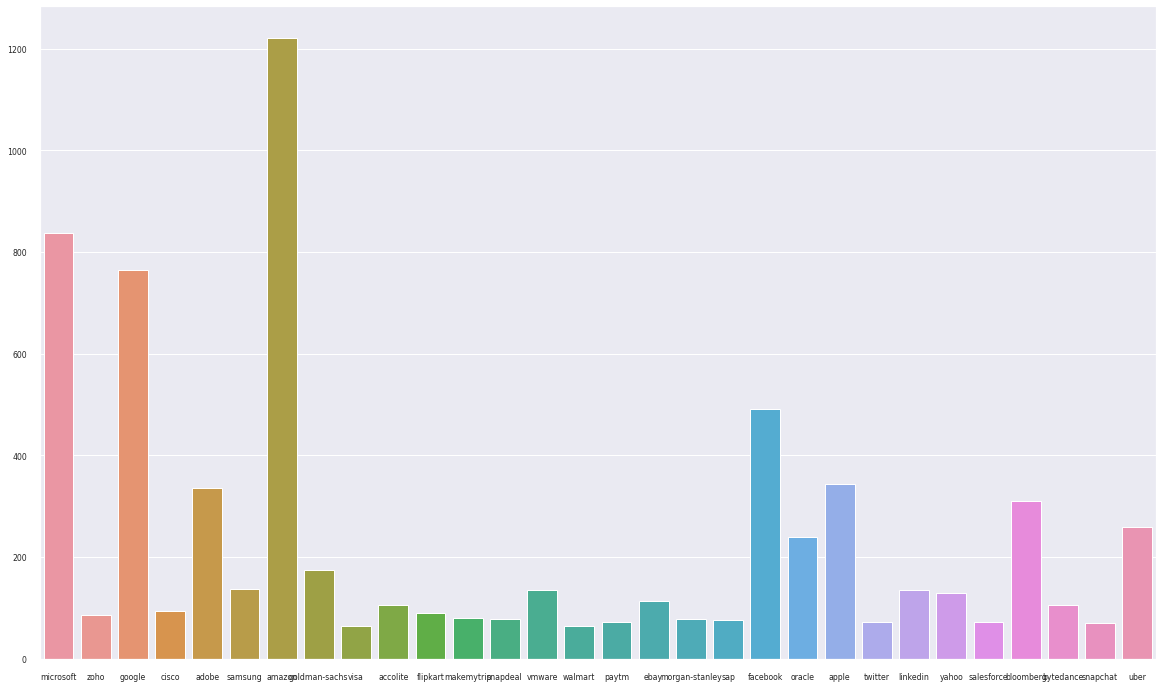

In [ ]:
sn.set(font_scale = 0.7)
plt.figure(figsize=(20,12))
ax= sn.barplot(df30.keys()[3:33], df30.iloc[:,3:33].sum().values)

Dropping all duplicate columns

In [ ]:
df30 = df30.drop_duplicates()

In [ ]:
df30.shape

(3683, 130)

Dropping all null values

In [ ]:
df30 = df30.dropna(0)

In [ ]:
df30.shape

(3649, 130)

Adding problem name and tags to problem statement

In [ ]:
for idx in df30.index:
  df30['problem_statement'][idx] = df['problem_name'][idx] + ' ' + df30['problem_statement'][idx]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for idx in df30.index:
  for tag in sum_tags.keys():
    if df30[tag][idx] == 1:
      df30['problem_statement'][idx] += ' '
      df30['problem_statement'][idx] += tag

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df30.head()

,problem_name,problem_link,problem_statement,microsoft,zoho,google,cisco,adobe,samsung,amazon,goldman-sachs,visa,accolite,flipkart,makemytrip,snapdeal,vmware,walmart,paytm,ebay,morgan-stanley,sap,facebook,oracle,apple,twitter,linkedin,yahoo,salesforce,bloomberg,bytedance,snapchat,uber,prefix-sum,math,trie,practice-problems,oop,regular expression,implementation,...,factorial,game theory,line sweep,cpp,algorithms,quantifiers,class,graph,greedy,set,java,operators,depth-first search,binary search,map,suffix array,logarithm,minimax,linked list,series,division,dynamic programming,union find,tree,stl,topological sort,permutation,memoization,array,searching,binary indexed tree,geometry,machine learning,data type,breadth-first search,logical-thinking,graph colouring,subset,traversal,shortest path
0,Geek-onacci Number,https://practice.geeksforgeeks.org/problems/ge...,Geek-onacci Number Geek created a random serie...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Matching Pair,https://practice.geeksforgeeks.org/problems/ma...,Matching Pair Given a set of numbers from 1 to...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Java Collections | Set 7 (LinkedList),https://practice.geeksforgeeks.org/problems/ja...,Java Collections | Set 7 (LinkedList) Given on...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Learning Structs,https://practice.geeksforgeeks.org/problems/le...,Learning Structs Structures are very useful wh...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Remainder Evaluation,https://practice.geeksforgeeks.org/problems/re...,Remainder Evaluation Given two positive intege...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df30.problem_statement.values

array(['Geek-onacci Number Geek created a random series and given a name geek-onacci series. Given four integers A, B, C, N. A, B, C represents the first three numbers of geek-onacci series. Find the Nth number of the series. The nth number of geek-onacci series is a sum of the last three numbers (summation of N-1th, N-2th, and N-3th geek-onacci numbers) recursion',
       'Matching Pair Given a set of numbers from 1 to N, each number is exactly present twice so there are N pairs. In the worst-case scenario, how many numbers X should be picked and removed from the set until we find a matching pair? math',
       'Java Collections | Set 7 (LinkedList) Given only a pointer to a node to be deleted in a singly linked list. Print the whole Linked List after deletion. java-collections java',
       ...,
       'Destination City You are given the array paths, where paths[i] = [cityAi, cityBi] means there exists a direct path going from cityAi to cityBi. Return the destination city, that is, t

Removing the tags columns (as they have been added to the problem statement)

In [ ]:
data = data.iloc[:,:33]

Wordcloud of the problem statement (before preprocessing)

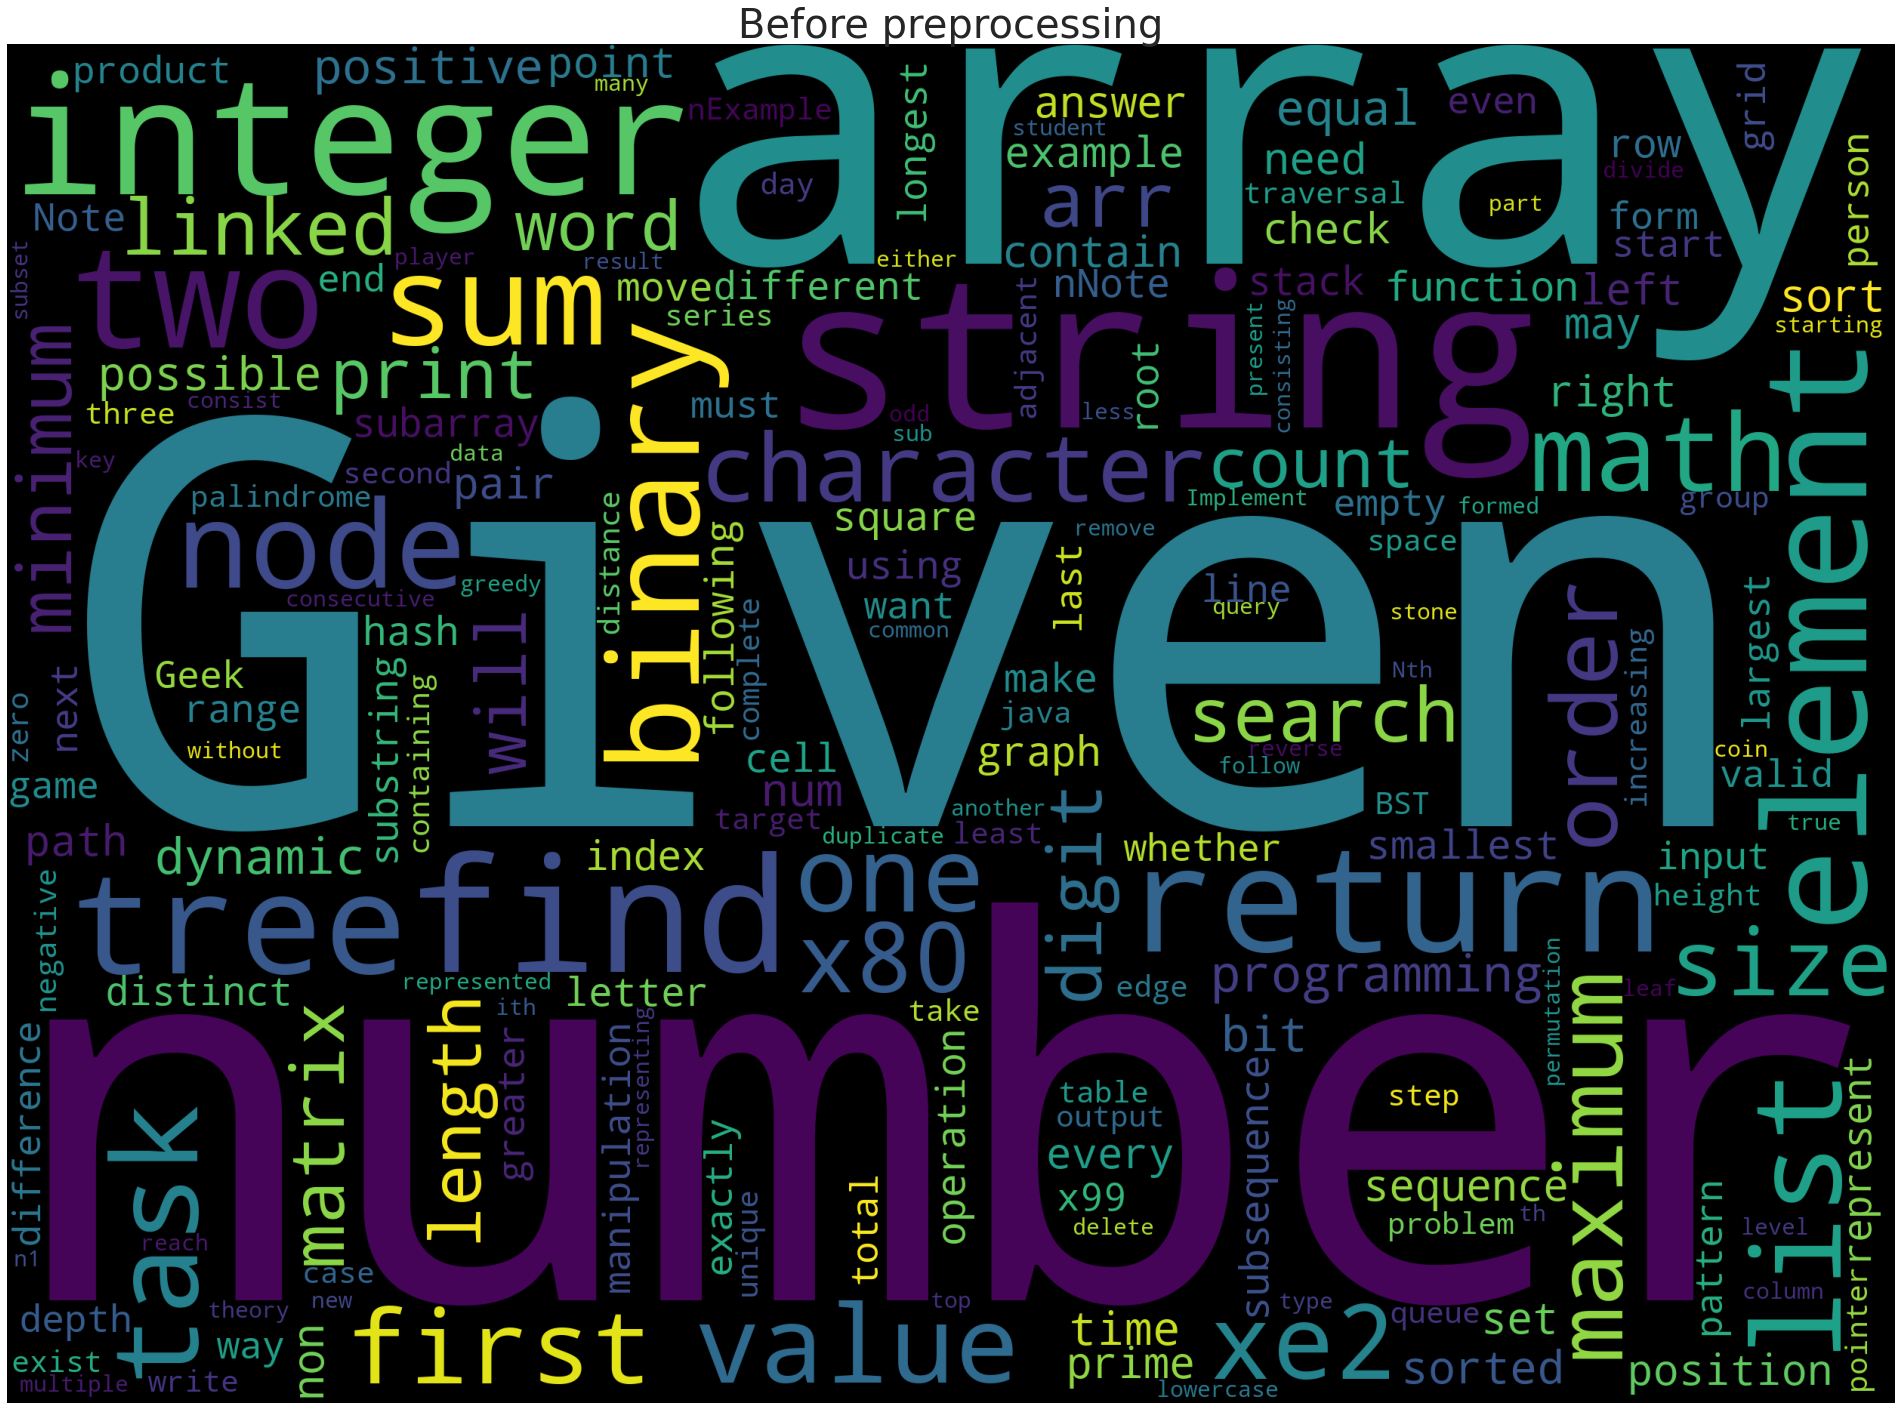

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# clean
subset = df30.copy()
text = subset.problem_statement.values
cloud_comp = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Before preprocessing",fontsize=40)
plt.imshow(cloud_comp)

##Preprocessing

In [ ]:
data = df30.copy()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

nltk.download('stopwords')

if not sys.warnoptions:
    warnings.simplefilter("ignore")

stop_words = set(stopwords.words('english'))
stop_words.update(['geek','given','zero','may','also','across','among','beside','however','yet','within','return'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Function to clean remove <html tags>
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

# Function to clean the word of any punctuation or special characters
def cleanPunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

# Function to produce pure alphabet based text
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

# Function to remove stopwords
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

# Function to stem the words to their base
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


In [ ]:
def preprocess(data, col = 'problem_statement'):
  data[col] = data[col].str.lower()
  data[col] = data[col].apply(cleanHtml)
  data[col] = data[col].apply(cleanPunc)
  data[col] = data[col].apply(keepAlpha)
  data[col] = data[col].apply(removeStopWords)
  data[col] = data[col].apply(stemming)
  return data

data = preprocess(data)

In [ ]:
data.head()

,problem_name,problem_link,problem_statement,microsoft,zoho,google,cisco,adobe,samsung,amazon,goldman-sachs,visa,accolite,flipkart,makemytrip,snapdeal,vmware,walmart,paytm,ebay,morgan-stanley,sap,facebook,oracle,apple,twitter,linkedin,yahoo,salesforce,bloomberg,bytedance,snapchat,uber,prefix-sum,math,trie,practice-problems,oop,regular expression,implementation,...,factorial,game theory,line sweep,cpp,algorithms,quantifiers,class,graph,greedy,set,java,operators,depth-first search,binary search,map,suffix array,logarithm,minimax,linked list,series,division,dynamic programming,union find,tree,stl,topological sort,permutation,memoization,array,searching,binary indexed tree,geometry,machine learning,data type,breadth-first search,logical-thinking,graph colouring,subset,traversal,shortest path
0,Geek-onacci Number,https://practice.geeksforgeeks.org/problems/ge...,onacci number creat random seri name onacci se...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Matching Pair,https://practice.geeksforgeeks.org/problems/ma...,match pair set number n number exact present t...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Java Collections | Set 7 (LinkedList),https://practice.geeksforgeeks.org/problems/ja...,java collect set linkedlist pointer node delet...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Learning Structs,https://practice.geeksforgeeks.org/problems/le...,learn struct structur use want creat link list...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Remainder Evaluation,https://practice.geeksforgeeks.org/problems/re...,remaind evalu two posit integ num num task fin...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Word cloud of the problem statement(after preprocessing)

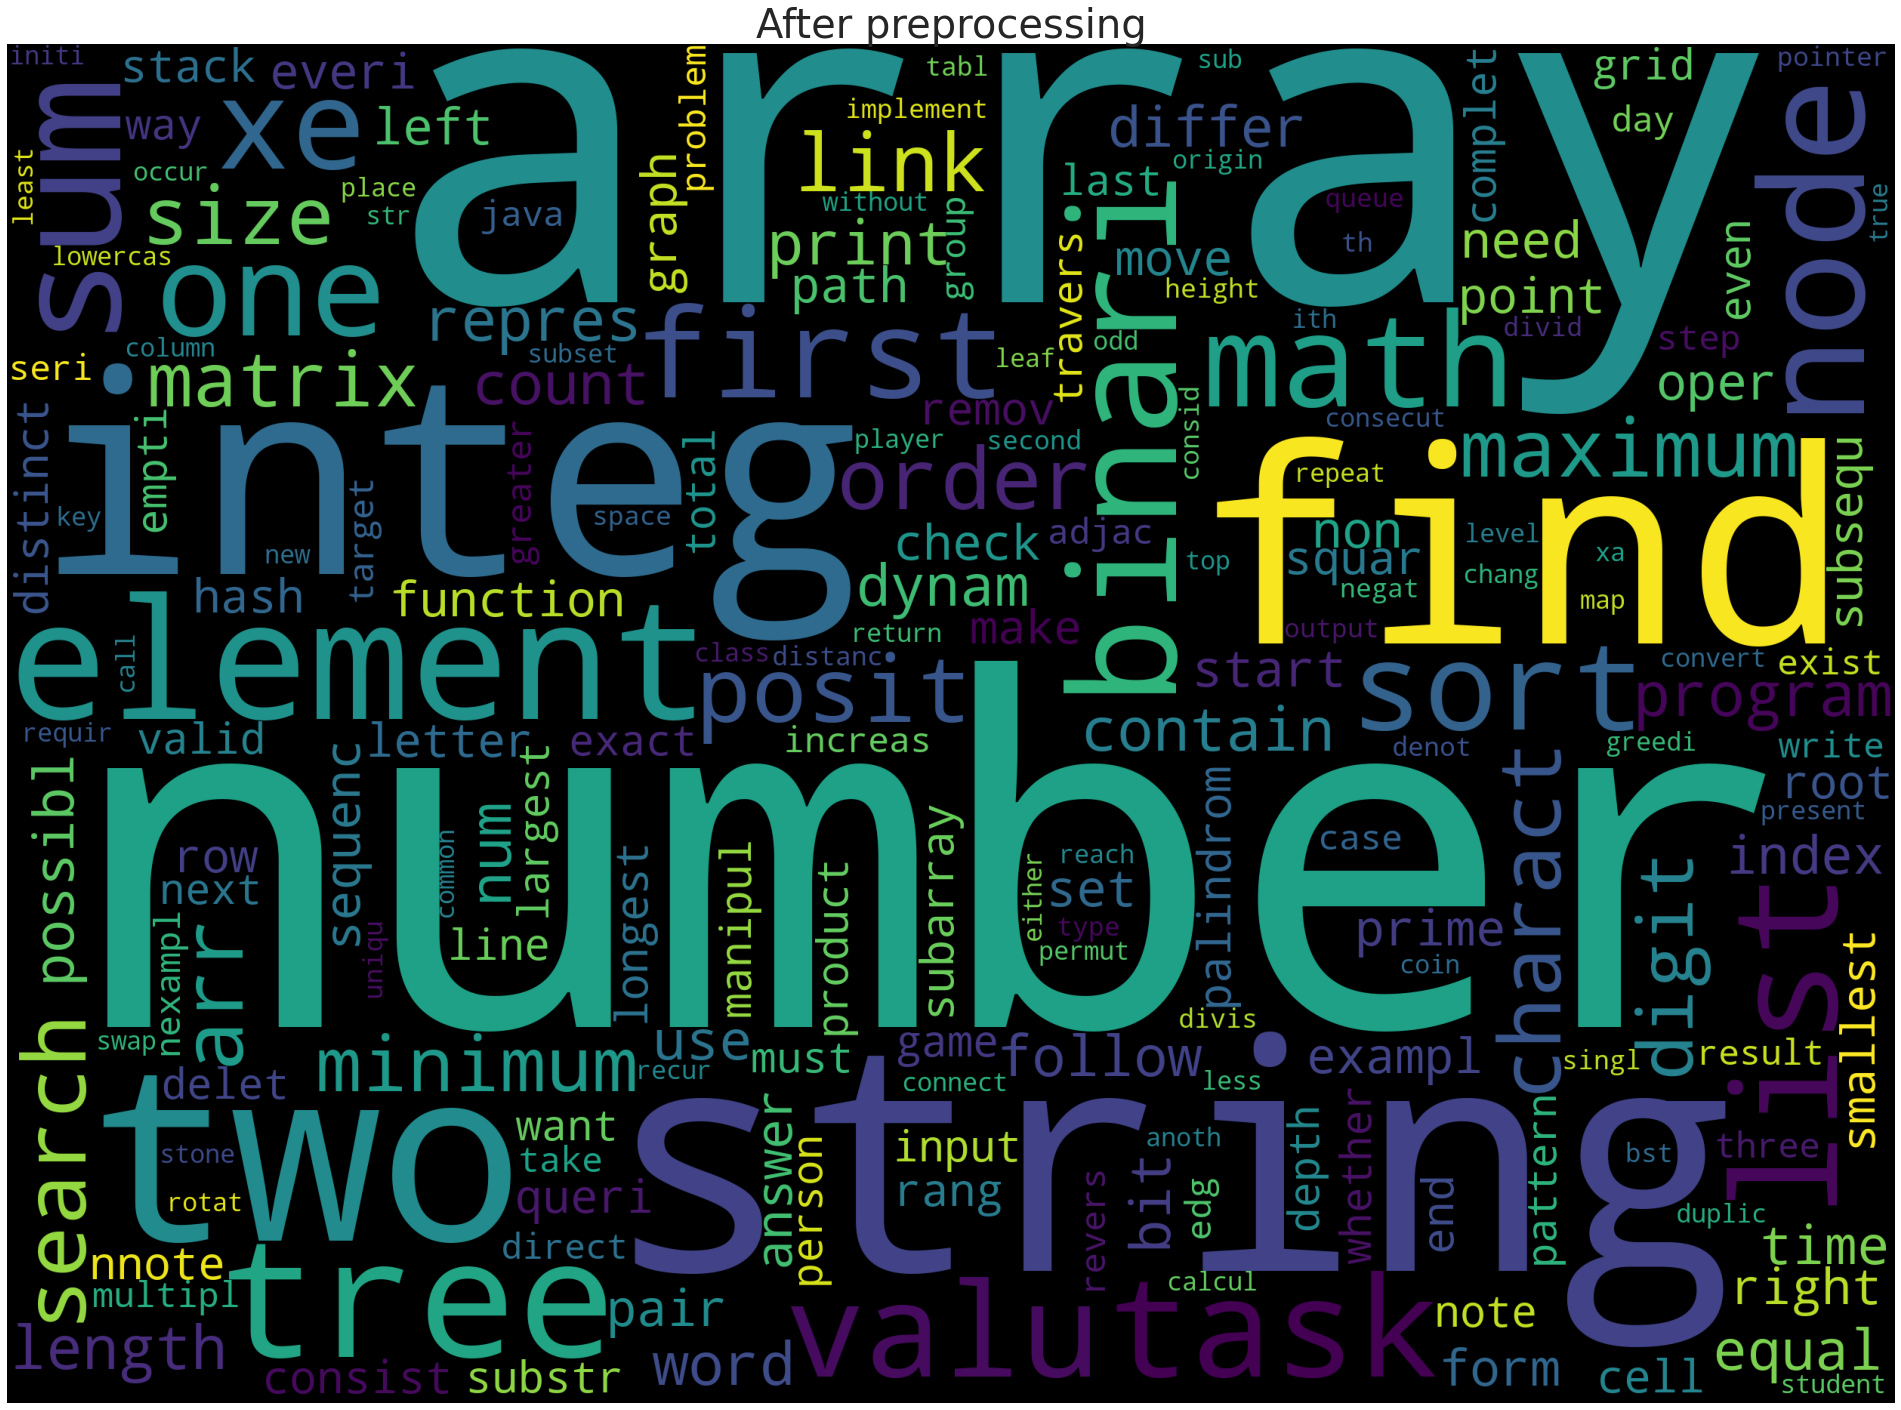

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# clean
subset = data.copy()
text = subset.problem_statement.values
cloud_comp = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("After preprocessing",fontsize=40)
plt.imshow(cloud_comp)

Creating the train-test dataset along with the (word frequency based) vectorizer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#for visualisation
import yellowbrick
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer

In [ ]:
train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', norm='l2')
vectorizer.fit(train['problem_statement'])
vectorizer.fit(test['problem_statement'])

x_train = vectorizer.transform(train['problem_statement'])
y_train = train.drop(labels = ['problem_statement','problem_link','problem_name'], axis=1)
x_test = vectorizer.transform(test['problem_statement'])
y_test = test.drop(labels = ['problem_statement','problem_link','problem_name'], axis=1)

In [ ]:
feature_names = vectorizer.get_feature_names()

In [ ]:
idfs = vectorizer.idf_

In [ ]:
print(sorted(idfs))

[1.8901748847435953, 1.9687372072466975, 2.0618862624255345, 2.2217701442853044, 2.4387408364924332, 2.5271517938364862, 2.5441013521502596, 2.7576754524483187, 2.7736757937947596, 2.9118261322755767, 2.9118261322755767, 2.9118261322755767, 2.9954761615625016, 3.0022101937438457, 3.0022101937438457, 3.008989880729225, 3.1015826675570493, 3.11662054492159, 3.1552353810493696, 3.1872381121355433, 3.2720346487956204, 3.2809235962128662, 3.2809235962128662, 3.2809235962128662, 3.3265936330460546, 3.414454988837389, 3.424711489004578, 3.424711489004578, 3.424711489004578, 3.424711489004578, 3.4350742760401247, 3.44554557590742, 3.456127685237957, 3.4776338904589204, 3.499612797177696, 3.5220856530297544, 3.617395832834079, 3.617395832834079, 3.655617045654277, 3.6819343539716503, 3.7227563484919055, 3.7367425904666454, 3.750927225458602, 3.7653159629107016, 3.7799147623318543, 3.7799147623318543, 3.7799147623318543, 3.7947298481169947, 3.7947298481169947, 3.7947298481169947, 3.8097677254815

In [ ]:
categories = data.keys()[3:]
len(categories)

30

In [ ]:
fi = dict()
for i in range(len(feature_names)):
  fi[feature_names[i]] = idfs[i]

In [ ]:
print(vectorizer.vocabulary_)

{'longest': 1055, 'subarray': 1844, 'sum': 1862, 'divis': 526, 'array': 101, 'contain': 384, 'integ': 903, 'posit': 1447, 'find': 676, 'length': 1016, 'sub': 1843, 'element': 574, 'valu': 2061, 'prefix': 1465, 'slide': 1750, 'window': 2120, 'hash': 803, 'lucki': 1072, 'number': 1301, 'matrix': 1100, 'distinct': 521, 'order': 1343, 'minimum': 1144, 'row': 1639, 'maximum': 1108, 'column': 334, 'destin': 488, 'citi': 302, 'path': 1394, 'cityai': 303, 'citybi': 304, 'mean': 1112, 'exist': 630, 'direct': 507, 'go': 761, 'without': 2125, 'outgo': 1355, 'anoth': 71, 'guarante': 789, 'graph': 776, 'form': 706, 'line': 1034, 'loop': 1057, 'therefor': 1927, 'exact': 619, 'one': 1330, 'remov': 1584, 'box': 207, 'sever': 1704, 'differ': 501, 'color': 333, 'repres': 1589, 'experi': 633, 'round': 1637, 'left': 1013, 'time': 1948, 'choos': 292, 'continu': 389, 'compos': 358, 'get': 754, 'point': 1436, 'dynam': 556, 'program': 1495, 'angl': 66, 'hand': 796, 'clock': 315, 'two': 2010, 'hour': 839, 'min

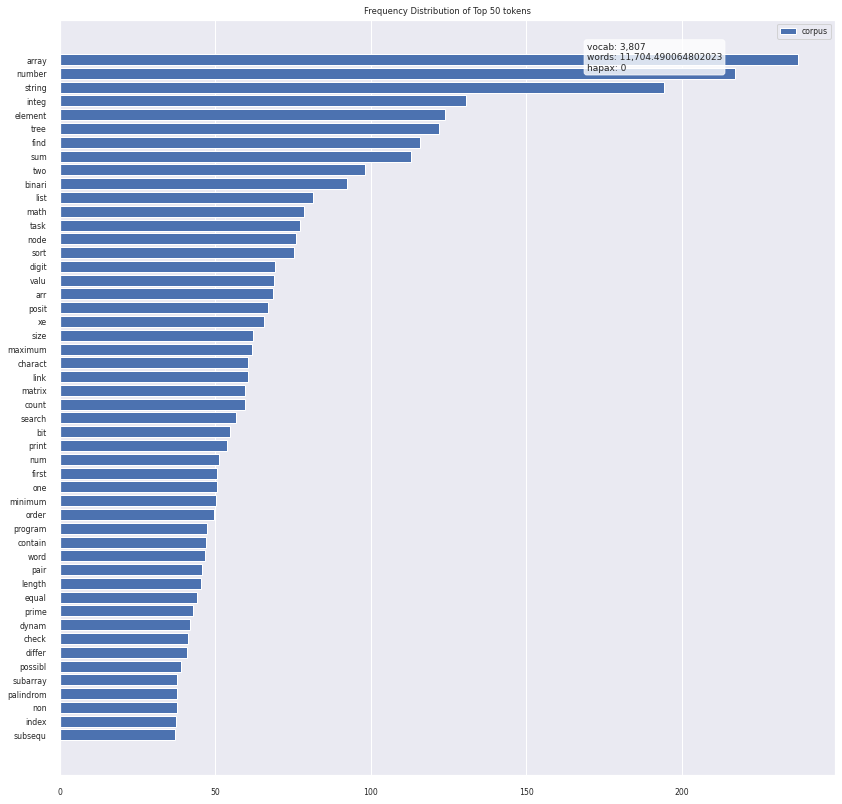

In [ ]:
docs = vectorizer.fit_transform(data['problem_statement'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features,size=(1000, 1000))
visualizer.fit(docs)
visualizer.poof()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

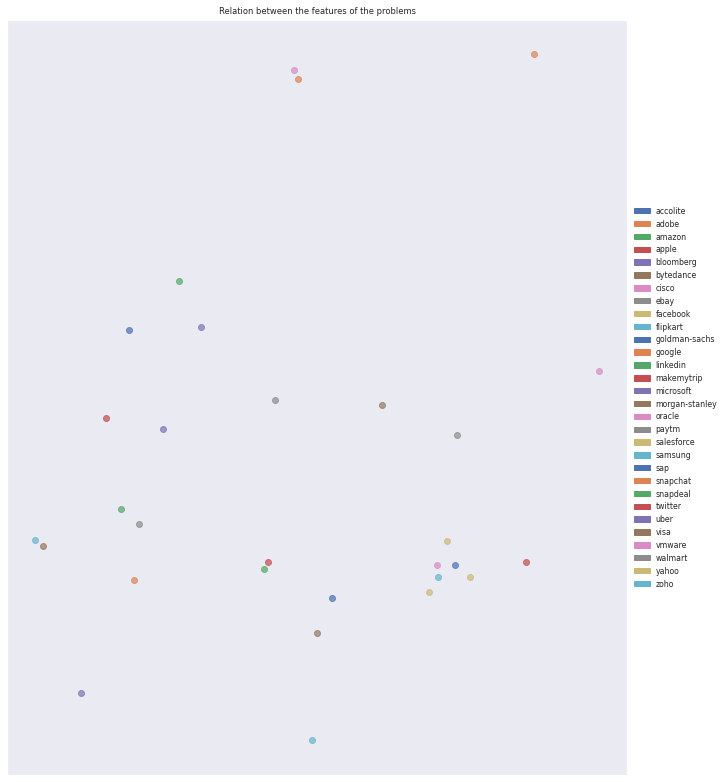

In [ ]:
docs = vectorizer.fit_transform(data['problem_statement'])
labels = categories

tsne = TSNEVisualizer(size=(1000, 1000), title='Relation between the features of the problems')
tsne.fit_transform(docs, labels)
tsne.poof()

In [ ]:
x_train,y_train

(<2554x2175 sparse matrix of type '<class 'numpy.float64'>'
 	with 38720 stored elements in Compressed Sparse Row format>,
       microsoft  zoho  google  cisco  ...  bloomberg  bytedance  snapchat  uber
 329           0     0       0      0  ...          0          0         0     0
 1393          0     0       0      0  ...          0          0         0     0
 2406          0     0       0      0  ...          0          0         0     0
 368           0     0       0      0  ...          0          0         0     0
 3163          0     0       1      0  ...          0          0         0     0
 ...         ...   ...     ...    ...  ...        ...        ...       ...   ...
 1132          0     0       0      0  ...          0          0         0     0
 1296          0     0       0      0  ...          0          0         0     0
 862           0     0       0      0  ...          0          0         0     0
 3524          0     0       1      0  ...          0          0   

##Training and Testing

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

One vs Rest Classifies

In [ ]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

total_accuracy = 0

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    current_accuracy = accuracy_score(test[category], prediction)
    total_accuracy += current_accuracy
    print('Test accuracy is {}'.format(current_accuracy))
    print("\n")
  

**Processing microsoft comments...**
Test accuracy is 0.7771689497716895


**Processing zoho comments...**
Test accuracy is 0.9780821917808219


**Processing google comments...**
Test accuracy is 0.8301369863013699


**Processing cisco comments...**
Test accuracy is 0.9762557077625571


**Processing adobe comments...**
Test accuracy is 0.9059360730593607


**Processing samsung comments...**
Test accuracy is 0.9616438356164384


**Processing amazon comments...**
Test accuracy is 0.7059360730593607


**Processing goldman-sachs comments...**
Test accuracy is 0.9378995433789954


**Processing visa comments...**
Test accuracy is 0.9817351598173516


**Processing accolite comments...**
Test accuracy is 0.965296803652968


**Processing flipkart comments...**
Test accuracy is 0.9771689497716894


**Processing makemytrip comments...**
Test accuracy is 0.9698630136986301


**Processing snapdeal comments...**
Test accuracy is 0.9735159817351599


**Processing vmware comments...**
Test accuracy is

In [ ]:
total_accuracy / 30

0.9381430745814306

In [ ]:
!pip install scikit-multilearn

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

##Binary Relevance

####Classifier: GaussianNB




In [ ]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(classifier = GaussianNB())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.1589041095890411


####Classifier: MultinomialNB

In [ ]:
# initialize binary relevance multi-label classifier
# with a multinomial naive bayes base classifier
classifier = BinaryRelevance(classifier = MultinomialNB())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.42191780821917807


####Classifier: SVC

In [ ]:
# initialize Binary Relevance multi-label classifier
# with an SVM classifier
# SVM in scikit only supports the X matrix in sparse representation

classifier = BinaryRelevance(
    classifier = SVC(),
    require_dense = [False, True]
)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.42648401826484017


####Classifier: Logistic regression

In [ ]:
classifier_brlr = BinaryRelevance(classifier = LogisticRegression())

# train
classifier_brlr.fit(x_train, y_train)

# predict
predictions = classifier_brlr.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.42557077625570777


####Classifier: Random Forest

In [ ]:
# initialize BinaryRelevance multi-label classifier with a RandomForest
classifier = BinaryRelevance(
    classifier = RandomForestClassifier(n_estimators=100),
    require_dense = [False, True]
)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.428310502283105


####Classifier: Decision Tree

In [ ]:
classifier = BinaryRelevance(classifier = DecisionTreeClassifier(random_state=0))

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.25388127853881276


##Classifier Chain

####Classifier: GaussianNB

In [ ]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

accuracy_score(y_test,predictions)


0.1598173515981735

###Classifier: MultinomialNB

In [ ]:
# initialize classifier chains multi-label classifier
# with a multinomial naive bayes base classifier
classifier = ClassifierChain(classifier = MultinomialNB())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.43105022831050227


####Classifier: SVC

In [ ]:
# initialize classifier chains multi-label classifier
# with an SVM classifier
# SVM in scikit only supports the X matrix in sparse representation

classifier = ClassifierChain(
    classifier = SVC(),
    require_dense = [False, True]
)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.4392694063926941


####Classifier: Logistic Regression

In [ ]:
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.43561643835616437




####Classifier: Random Forest

In [ ]:
# initialize Classifier Chain multi-label classifier with a RandomForest
classifier = ClassifierChain(
    classifier = RandomForestClassifier(n_estimators=100),
    require_dense = [False, True]
)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.44018264840182647


####Classifier: Decision Tree

In [ ]:
classifier = ClassifierChain(classifier = DecisionTreeClassifier(random_state=0))

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.2730593607305936


###Label Powerset

####Classifier: GaussianNB

In [ ]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

accuracy_score(y_test,predictions)

0.29497716894977166

####Classifier: MultinomialNB

In [ ]:
# initialize Label Powerset multi-label classifier
# with a multinomial naive bayes base classifier
classifier = LabelPowerset(classifier = MultinomialNB())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.44018264840182647


####Classifier: SVC

In [ ]:
# initialize Label Powerset chains multi-label classifier
# with an SVM classifier
# SVM in scikit only supports the X matrix in sparse representation

classifier = LabelPowerset(
    classifier = SVC(),
    require_dense = [False, True]
)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.4410958904109589


####Classifier: Logisitic Regression

In [ ]:
# using Label Powerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.4392694063926941




####Classifier: Random Forest


In [ ]:
# initialize Label Powerset multi-label classifier with a RandomForest
classifier = LabelPowerset(
    classifier = RandomForestClassifier(n_estimators=100),
    require_dense = [False, True]
)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.4429223744292237


####Classifier: Decision Tree

In [ ]:
classifier = LabelPowerset(classifier = DecisionTreeClassifier(random_state=0))

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.32146118721461187


#Adaptive approach: MLKNN

In [ ]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
classifier_new = MLkNN()
# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()
# train
classifier_new.fit(x_train, y_train)
# predict
predictions_new = classifier_new.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))

Accuracy =  0.3789954337899543


In [ ]:
classifier = MLkNN(k=20)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions_new))

Accuracy =  0.3789954337899543


In [ ]:
classifier = MLkNN(k=30)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions_new))

Accuracy =  0.3789954337899543


In [ ]:
classifier = MLkNN(k=50)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions_new))

Accuracy =  0.3789954337899543


#Ensemble Learning

In [ ]:
from skmultilearn.ensemble import RakelD
classifier = RakelD(
    base_classifier=GaussianNB(),
    base_classifier_require_dense=[True, True],
    labelset_size=4
)

classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions_new))

/usr/local/lib/python3.7/dist-packages/skmultilearn/cluster/random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(label_sets)


Accuracy =  0.3789954337899543


#LSTM

In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 100
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(data['problem_statement'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3827 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(data['problem_statement'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (3649, 100)


In [ ]:
Y = data.iloc[:,3:]
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (3649, 30)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3284, 100) (3284, 30)
(365, 100) (365, 30)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2)) 
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(30, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 25
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/25
47/47 [==============================] - 19s 342ms/step - loss: 6.1813 - accuracy: 0.1108 - val_loss: 6.0527 - val_accuracy: 0.1003
Epoch 2/25
47/47 [==============================] - 16s 333ms/step - loss: 6.1048 - accuracy: 0.0962 - val_loss: 5.9110 - val_accuracy: 0.1003
Epoch 3/25
47/47 [==============================] - 16s 335ms/step - loss: 5.7909 - accuracy: 0.0930 - val_loss: 5.8828 - val_accuracy: 0.1003
Epoch 4/25
47/47 [==============================] - 16s 333ms/step - loss: 5.8628 - accuracy: 0.1035 - val_loss: 5.9151 - val_accuracy: 0.1003
Epoch 5/25
47/47 [==============================] - 16s 336ms/step - loss: 5.7194 - accuracy: 0.1042 - val_loss: 5.8757 - val_accuracy: 0.1003
Epoch 6/25
47/47 [==============================] - 16s 332ms/step - loss: 5.7159 - accuracy: 0.0939 - val_loss: 5.9072 - val_accuracy: 0.1003
Epoch 7/25
47/47 [==============================] - 16s 331ms/step - loss: 6.1119 - accuracy: 0.1008 - val_loss: 5.8940 - val_accuracy: 0.1003

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

12/12 [==============================] - 0s 28ms/step - loss: 5.9017 - accuracy: 0.1205
Test set
  Loss: 5.902
  Accuracy: 0.121


In [ ]:
y_pred = model.predict(X_test, batch_size=100)
print(y_pred)
print(len(y_pred),len(y_pred[0]))
print(Y_test.values)
Y_test_v = Y_test.values
for idx,row in enumerate(y_pred):
  count = 0
  for ele in Y_test_v[idx]:
    if ele == 1:
      count += 1
  indexes = row.argsort()[-count:][::-1]
  for i in range(len(row)):
    y_pred[idx][i] = 0
  for idx2 in indexes:
    y_pred[idx][idx2] = 1
print ('Accuracy on validation data: ' + str(accuracy_score(Y_test_v, y_pred)))

[[0.17274505 0.00220715 0.15305063 ... 0.00510069 0.00203232 0.02984167]
 [0.17266487 0.00221446 0.15305023 ... 0.0051121  0.00204077 0.02988317]
 [0.17266159 0.00221501 0.15305023 ... 0.00511303 0.00204153 0.02988762]
 ...
 [0.17275089 0.00220657 0.1530523  ... 0.0050999  0.00203171 0.02983904]
 [0.17274033 0.00220753 0.15305112 ... 0.00510129 0.00203276 0.02984365]
 [0.17274539 0.00220715 0.15304919 ... 0.00510069 0.00203233 0.02984179]]
365 30
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy on validation data: 0.1095890410958904


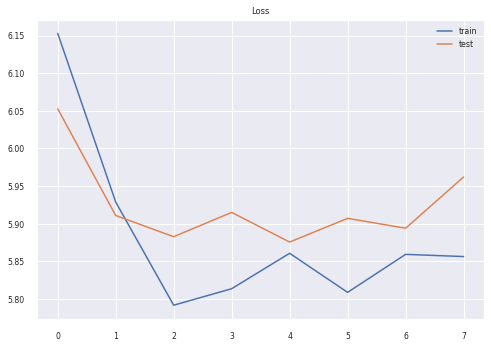

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();